# Airline Passenger Satisfaction Prediction using AutoML

## Project Overview
Customer satisfaction is a critical metric in the airline industry.  
This notebook applies **AutoML** using **AutoGluon** to predict whether a passenger is **satisfied** or **neutral/dissatisfied** based on survey and service quality data.

### Workflow
1. Data exploration and preprocessing  
2. AutoML model training and leaderboard evaluation  
3. Selecting the best model (WeightedEnsemble_L2)  
4. Feature importance analysis  
5. Model evaluation on test data  
6. Actionable business insights

## Dataset

**Source:** Kaggle – Airline Passenger Satisfaction  
**Link:** https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction  

**Target Variable:** `satisfaction`  
**Classes:**  
- `satisfied`  
- `neutral or dissatisfied`  

**Features:**  
24 features including customer demographics, flight details, service quality ratings, and operational metrics.

## Objectives
- Train an AutoML model to predict passenger satisfaction
- Identify key drivers of satisfaction
- Generate actionable insights for airline service improvement

## Tools & Technologies
- Python
- Pandas
- AutoGluon
- Matplotlib & Seaborn
- Kaggle Notebook Environment


In [1]:
# Enable internet in Kaggle before running this cell
!pip install -U autogluon --quiet

# Verify Installation
from autogluon.tabular import TabularPredictor
print("AutoGluon installed successfully")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.1/452.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.2/515.2 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 4.6 MB/s eta 0:00:0

## Dataset Description

### Feature Categories
- **Customer Information:** Gender, Age, Customer Type  
- **Flight Details:** Class, Type of Travel, Flight Distance  
- **Service Quality Ratings:** Seat comfort, Inflight wifi, Cleanliness, Food & drink, Inflight entertainment, Inflight service, On-board service, Leg room service, Gate location, Checkin service, Online boarding, Baggage handling, Ease of online booking, Departure/Arrival time convenient  
- **Operational Metrics:** Departure delay, Arrival delay

In [2]:
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv", index_col=0)
test_df  = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv", index_col=0)

train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Inspection

We inspect the dataset to understand:
- Data types and missing values
- Target class distribution
- Readiness for AutoML training

In [3]:
# Dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [4]:
# Target class distribution
train_df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

## Why AutoML?

Traditional ML requires:
- Feature preprocessing
- Model selection
- Hyperparameter tuning
- Ensemble construction

AutoML automates these steps, enabling:
- Training multiple models efficiently
- Building strong ensembles
- Reliable feature importance extraction
- Faster insight generation

## Model Training with AutoGluon

We use **TabularPredictor** with **F1 Macro** as the evaluation metric, which is more reliable than accuracy for slightly imbalanced classification tasks.

In [5]:
from autogluon.tabular import TabularPredictor

# Drop identifier column
train_df_clean = train_df.drop(columns=["id"])
test_df_clean  = test_df.drop(columns=["id"])

# Train AutoML model
predictor = TabularPredictor(
    label="satisfaction",
    eval_metric="f1_macro"  # better than accuracy for slightly imbalanced classes
).fit(
    train_data=train_df_clean,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20251228_144050"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Sep 27 10:16:09 UTC 2025
CPU Count:          4
Pytorch Version:    2.8.0+cu126
CUDA Version:       CUDA is not available
Memory Avail:       29.70 GB / 31.35 GB (94.7%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme'  : New in v1.5: The state-of-the-art for tabular data. Massively better than 'best' on datasets <100000 samples by using new Tabular Foundation Models (TFMs) meta-learned on https://tabarena.a

In [6]:
# View leaderboard
predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.974326,f1_macro,0.063974,126.843773,0.003004,0.616419,2,True,12
1,NeuralNetFastAI,0.972696,f1_macro,0.048555,123.253700,0.048555,123.253700,1,True,8
2,LightGBMLarge,0.970675,f1_macro,0.012415,2.973654,0.012415,2.973654,1,True,11
3,XGBoost,0.970278,f1_macro,0.020808,3.433047,0.020808,3.433047,1,True,9
4,LightGBM,0.969874,f1_macro,0.031317,4.866386,0.031317,4.866386,1,True,2
5,NeuralNetTorch,0.969443,f1_macro,0.023693,265.463689,0.023693,265.463689,1,True,10
6,RandomForestEntr,0.968621,f1_macro,0.125777,17.170852,0.125777,17.170852,1,True,4
7,RandomForestGini,0.967402,f1_macro,0.136667,17.528431,0.136667,17.528431,1,True,3
8,CatBoost,0.967021,f1_macro,0.011962,181.673472,0.011962,181.673472,1,True,5
9,ExtraTreesEntr,0.966579,f1_macro,0.142585,9.879225,0.142585,9.879225,1,True,7


## Model Selection

After training multiple models, we review the leaderboard:

- **WeightedEnsemble_L2** achieved the highest **F1 Macro score (~0.97)**  
- Other strong models include:
  - NeuralNetFastAI  
  - LightGBMLarge  
  - XGBoost  
  - LightGBM  

**Decision:**  
Use **WeightedEnsemble_L2** as the final model due to its superior and balanced performance across both satisfaction classes.


## Feature Importance Analysis

We analyze which features most influence passenger satisfaction based on the final ensemble model.

In [7]:
# Compute feature importance
feature_importance = predictor.feature_importance(train_df_clean)
feature_importance

Computing feature importance via permutation shuffling for 22 features using 5000 rows with 5 shuffle sets...
	16.55s	= Expected runtime (3.31s per shuffle set)
	11.14s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Inflight wifi service,0.241452,0.006387,5.871636e-08,5,0.254604,0.228300
Type of Travel,0.192204,0.005282,6.838639e-08,5,0.203080,0.181327
Gate location,0.101478,0.004134,3.298391e-07,5,0.109991,0.092966
Customer Type,0.090070,0.005155,1.281834e-06,5,0.100684,0.079456
Baggage handling,0.046435,0.001101,3.790976e-08,5,0.048702,0.044168
Inflight service,0.036063,0.002389,2.297057e-06,5,0.040982,0.031144
Online boarding,0.033136,0.003296,1.159014e-05,5,0.039922,0.026350
Seat comfort,0.024594,0.003214,3.423343e-05,5,0.031212,0.017975
Checkin service,0.022878,0.003268,4.863177e-05,5,0.029607,0.016149
Class,0.021491,0.002875,3.753706e-05,5,0.027411,0.015571


### Feature Importance Summary

#### Top Drivers of Satisfaction
1. **Inflight wifi service**
2. **Type of Travel**
3. **Gate location**
4. **Customer Type**
5. **Baggage handling**

#### Moderate Influence
- Inflight service  
- Online boarding  
- Seat comfort  
- Checkin service  
- Class  
- On-board service  
- Inflight entertainment  

#### Lower Influence
- Age  
- Cleanliness  
- Leg room service  
- Delays  
- Flight distance  
- Food & drink  
- Gender  

### Business Interpretation
- Service quality and convenience dominate satisfaction
- Operational improvements in **wifi, boarding, baggage, and gate operations** yield the highest impact
- Demographic factors play a minor role

## Feature Importance Visualization

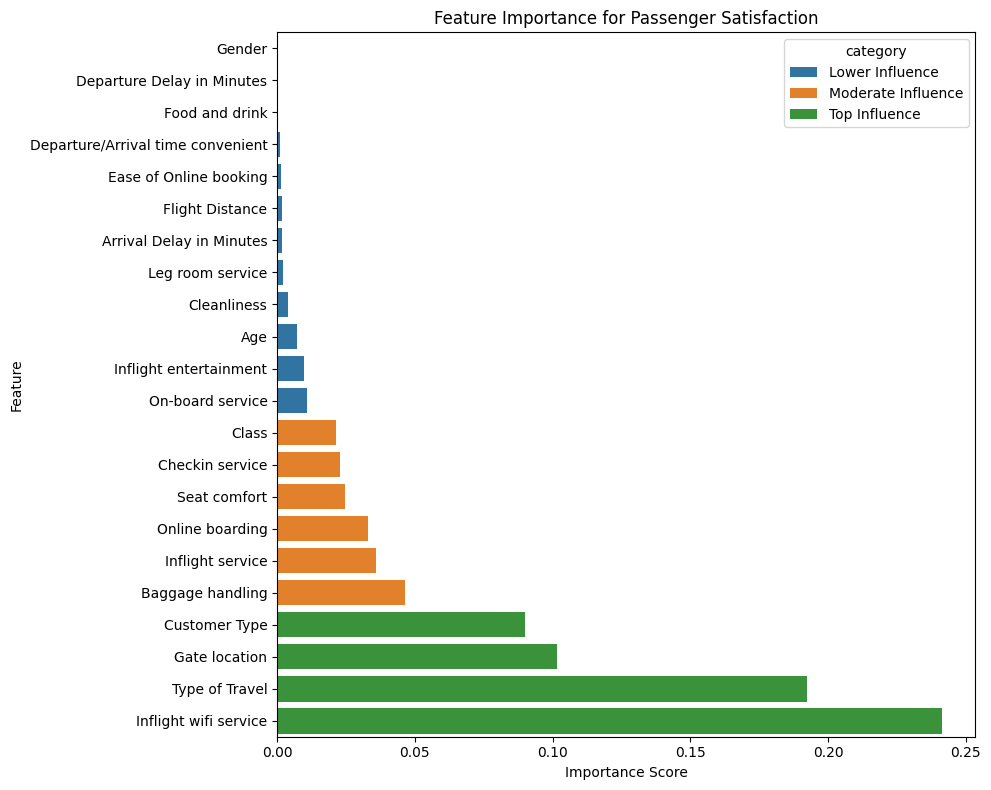

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare feature importance for plotting
df = feature_importance.reset_index().rename(
    columns={"index": "feature", "importance": "importance"}
)

# Categorize features by influence
def categorize(value):
    if value >= 0.05:
        return "Top Influence"
    elif value >= 0.02:
        return "Moderate Influence"
    else:
        return "Lower Influence"

df["category"] = df["importance"].apply(categorize)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df.sort_values("importance", ascending=True),
    x="importance",
    y="feature",
    hue="category",
    dodge=False
)
plt.title("Feature Importance for Passenger Satisfaction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Model Evaluation

We evaluate the final model on unseen test data using:
- Precision, Recall, F1-score
- Confusion Matrix

This confirms real-world generalization.


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_true = test_df['satisfaction']
y_pred = predictor.predict(test_df)

# Classification report
print(classification_report(y_true, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14573
              satisfied       0.97      0.95      0.96     11403

               accuracy                           0.97     25976
              macro avg       0.97      0.96      0.97     25976
           weighted avg       0.97      0.97      0.97     25976



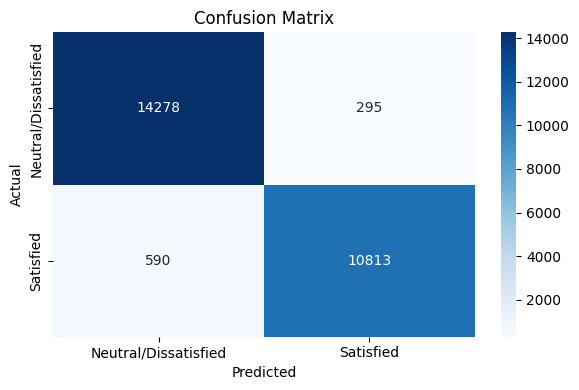

In [10]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Neutral/Dissatisfied", "Satisfied"],
    yticklabels=["Neutral/Dissatisfied", "Satisfied"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## Business Insights & Conclusion

### Key Insights
- **Service quality is the strongest driver** of satisfaction
- **Customer segmentation matters** (Type of Travel, Customer Type)
- **Operational focus areas:** wifi, boarding process, baggage handling
- Minor features (age, food, entertainment) have limited impact

### Conclusion
The AutoML pipeline successfully delivers a **high-performing, well-generalized model** using **WeightedEnsemble_L2**.  
Feature importance analysis provides **clear, actionable insights** that airlines can use to improve customer satisfaction and operational efficiency.
